# Historical Popularity Index Analysis

    - This exploratory analysis aims to investigate the "Historical Popularity Index", or "Pantheon Project" dataset. 
    - The dataset aims to provide a means of comparing 'popularity' amongst historical figures, by using metrics such as "page views", "article languages", and "average views". This is then summarized with the actual "historical popularity index" feature.
    - First we must see what features the dataset has, and then try and get a grasp on trends/outliers.

In [1]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization 
import folium
import matplotlib.pyplot as plt

In [2]:
# Importing Data

filepath = '/kaggle/input/pantheon-project/database.csv'

pantheon = pd.read_csv(filepath)

pantheon.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


### Initial observations
    - The dataset contains geographical information for each person, as well as their birth year, occupation, domain, and industry. These features could all be used for interesting analyses, such as which country is the "most popular" historically, when the most popular people were typically born, which occupations produced the most popular people, as well as a geospatial analysis as the latitude and longitude features lend the dataset nicely to some interactive maps, via Folium for example.
    - The dataset is sorted in descending order according to the historical_popularity_index feature, thus we can simply query the top X records to get the top X most popular historical figures.

<function matplotlib.pyplot.show(close=None, block=None)>

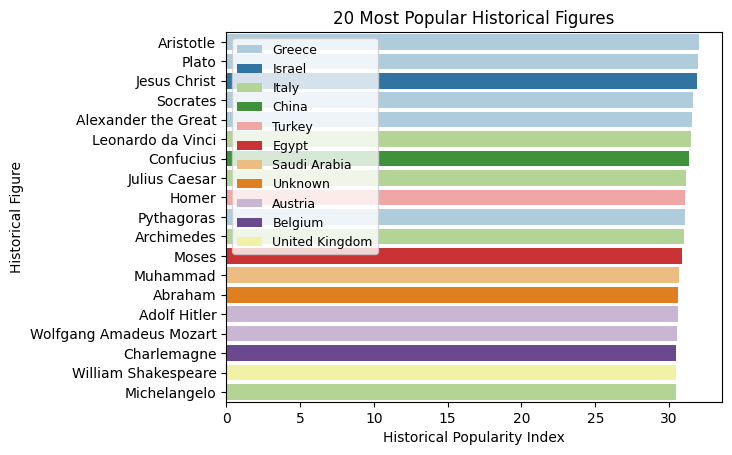

In [3]:
# Top 20 historical figures

panth_20 = pantheon[0:19]
features = ['historical_popularity_index','full_name', 'country']

fig, ax = plt.subplots()
ax.set_title("20 Most Popular Historical Figures")
ax = sns.barplot(data = panth_20[features], x = 'historical_popularity_index', y = 'full_name',
                palette = "Paired",hue = "country", dodge = False)

ax.set_xlabel("Historical Popularity Index")
ax.set_ylabel("Historical Figure")

plt.legend(loc = "upper left",fontsize=9)
plt.show

    - The above chart shows the top 20 most popular historical figures (according to the historical popularity index), and also provides a color encoding to show what country each figure originates from. We see that 4 of the top 5 historical figures originate from Greece, and a number of the other figures originating from Italy.

## Historical Popularity by Country
    - This section will group the data by country, summing the historical popularity index per figure to get an idea of what countries are historically "most popular".

In [4]:
country_pantheon = pantheon[['country','historical_popularity_index']].groupby("country").sum()
country_pantheon.sort_values(by='historical_popularity_index',ascending=False).head()

,historical_popularity_index
country,
United States,46614.3934
United Kingdom,25203.5066
France,20370.5983
Italy,19375.6038
Germany,17229.0130
